Виктор Јовев   
Индекс: 186068

**Attribute Information:**

11 predictive attributes, 1 non-predictive(p1), 2 goal fields:
1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
5. stabf: the stability label of the system (categorical: stable/unstable)

**Abstract:** The local stability analysis of the 4-node star system (electricity producer is in the center) implementing Decentral Smart Grid Control concept.



In [58]:
#!pip install missingno

In [116]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
% matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve, roc_auc_score

In [60]:
df = pd.read_csv("/content/Data_for_UCI_named.csv")

In [61]:
df.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
5,6.999209,9.109247,3.784066,4.267788,4.429669,-1.857139,-0.670397,-1.902133,0.261793,0.077930,0.542884,0.469931,-0.017385,stable
6,6.710166,3.765204,6.929314,8.818562,2.397419,-0.614590,-1.208826,-0.574004,0.177890,0.397977,0.402046,0.376630,0.005954,unstable
7,6.953512,1.379125,5.719400,7.870307,3.224495,-0.748998,-1.186517,-1.288980,0.371385,0.633204,0.732741,0.380544,0.016634,unstable
8,4.689852,4.007747,1.478573,3.733787,4.041300,-1.410344,-1.238204,-1.392751,0.269708,0.250364,0.164941,0.482439,-0.038677,stable
9,9.841496,1.413822,9.769856,7.641616,4.727595,-1.991363,-0.857637,-1.878594,0.376356,0.544415,0.792039,0.116263,0.012383,unstable


In [62]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

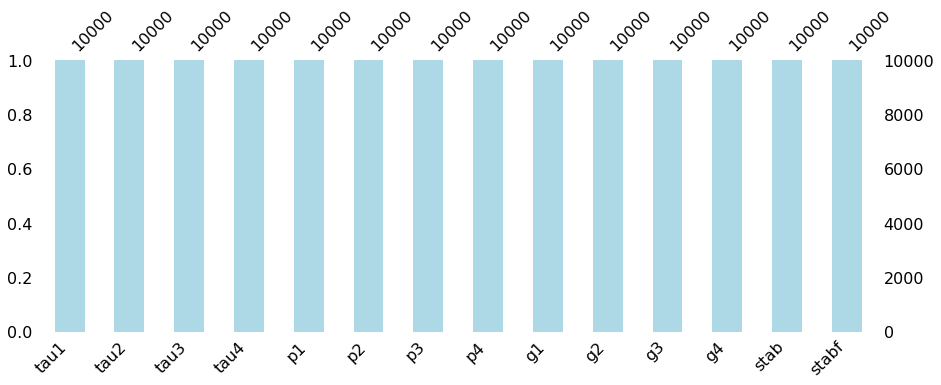

In [63]:
msno.bar(df,color='lightblue',figsize=(15,5)) #check for missing values

In [64]:
df.describe() #Check for outliers

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


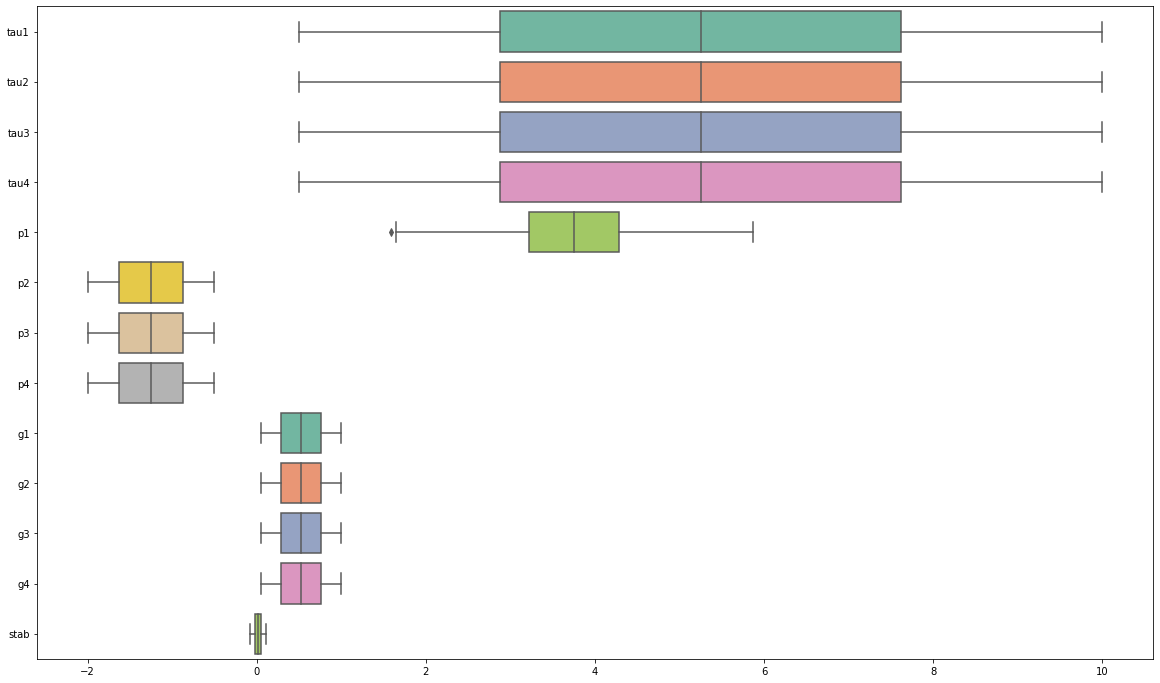

In [65]:
fig=plt.figure(figsize=(20,12))
sns.boxplot(data=df,orient="h",palette="Set2")
plt.show()
#There is an outlier in p1 feature.

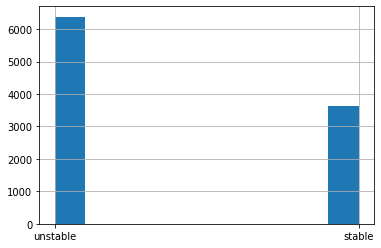

In [66]:
df.stabf.hist()

In [67]:
encoded_data_lab=df[['stabf']].apply(LabelEncoder().fit_transform)
encoded_data_lab= encoded_data_lab.join(df.drop(columns=['stabf'],axis=1))
encoded_data_lab.head()

,stabf,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,1,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,0,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,1,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,1,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,1,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860


In [68]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

lab_dataX= encoded_data_lab.drop(columns=['stabf'],axis=1)

In [69]:
scaler = MinMaxScaler() #before using PCA, we need to normalize features
scaler.fit(lab_dataX)
lab_dataX = scaler.transform(lab_dataX)

In [70]:
lab_dataX = pd.DataFrame(lab_dataX, columns=encoded_data_lab.drop(columns=['stabf'],axis=1).columns)
lab_dataX

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,0.258801,0.271561,0.829616,0.976978,0.509244,0.811642,0.495075,0.184572,0.632098,0.852229,0.881531,0.955894,0.715740
1,0.926793,0.463424,0.268117,0.091471,0.813957,0.039894,0.084809,0.496642,0.382588,0.855215,0.539078,0.770323,0.393359
2,0.891799,0.878795,0.268005,0.075171,0.425652,0.528367,0.481864,0.719670,0.118990,0.754440,0.831000,0.062980,0.442940
3,0.022700,0.754704,0.419623,0.193715,0.556118,0.648372,0.040670,0.668412,0.417084,0.975576,0.925677,0.329181,0.576507
4,0.277230,0.748301,0.467747,0.985065,0.453830,0.582991,0.102655,0.963811,0.786481,0.426782,0.638883,0.811553,0.686885
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.255784,0.946081,0.197474,0.598731,0.411232,0.894688,0.367257,0.509147,0.580781,0.768076,0.803701,0.587804,0.550325
9996,0.304411,0.081549,0.258369,0.673156,0.646201,0.224186,0.698398,0.177686,0.475899,0.544472,0.248257,0.332762,0.288997
9997,0.196158,0.246523,0.871239,0.053525,0.634632,0.412841,0.704100,0.016370,0.460907,0.985852,0.104463,0.101016,0.257411
9998,0.961262,0.367828,0.237537,0.770702,0.217703,0.689141,0.900097,0.734325,0.331853,0.565859,0.883293,0.808887,0.623405


In [71]:
lab_dataY= encoded_data_lab['stabf']
x_train_lab, x_test_lab, y_train_lab, y_test_lab = train_test_split(lab_dataX, lab_dataY, test_size=1 - train_ratio,  random_state=0)
x_val_lab, x_test_lab, y_val_lab, y_test_lab = train_test_split(x_test_lab, y_test_lab, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

In [72]:
new_df = lab_dataX.join(lab_dataY)
new_df.head() # normalized features and encoded target class

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,0.258801,0.271561,0.829616,0.976978,0.509244,0.811642,0.495075,0.184572,0.632098,0.852229,0.881531,0.955894,0.715740,1
1,0.926793,0.463424,0.268117,0.091471,0.813957,0.039894,0.084809,0.496642,0.382588,0.855215,0.539078,0.770323,0.393359,0
2,0.891799,0.878795,0.268005,0.075171,0.425652,0.528367,0.481864,0.719670,0.118990,0.754440,0.831000,0.062980,0.442940,1
3,0.022700,0.754704,0.419623,0.193715,0.556118,0.648372,0.040670,0.668412,0.417084,0.975576,0.925677,0.329181,0.576507,1
4,0.277230,0.748301,0.467747,0.985065,0.453830,0.582991,0.102655,0.963811,0.786481,0.426782,0.638883,0.811553,0.686885,1


In [73]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(lab_dataX)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['stabf']]], axis = 1)

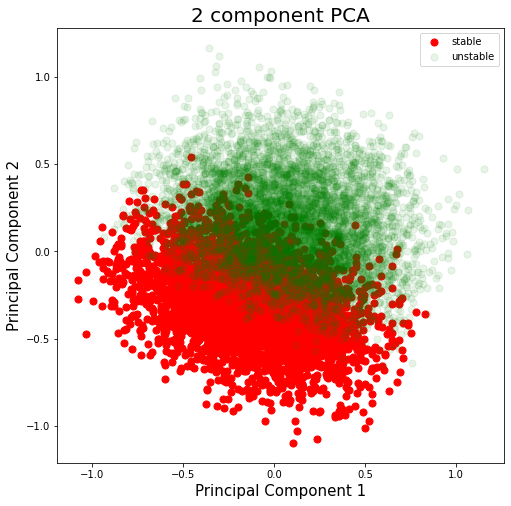

In [74]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['stable', 'unstable']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stabf'] == target
    if target == 'unstable':
      ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50,alpha=0.09)
    else:
      ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
plt.show() #they aren't fully separable

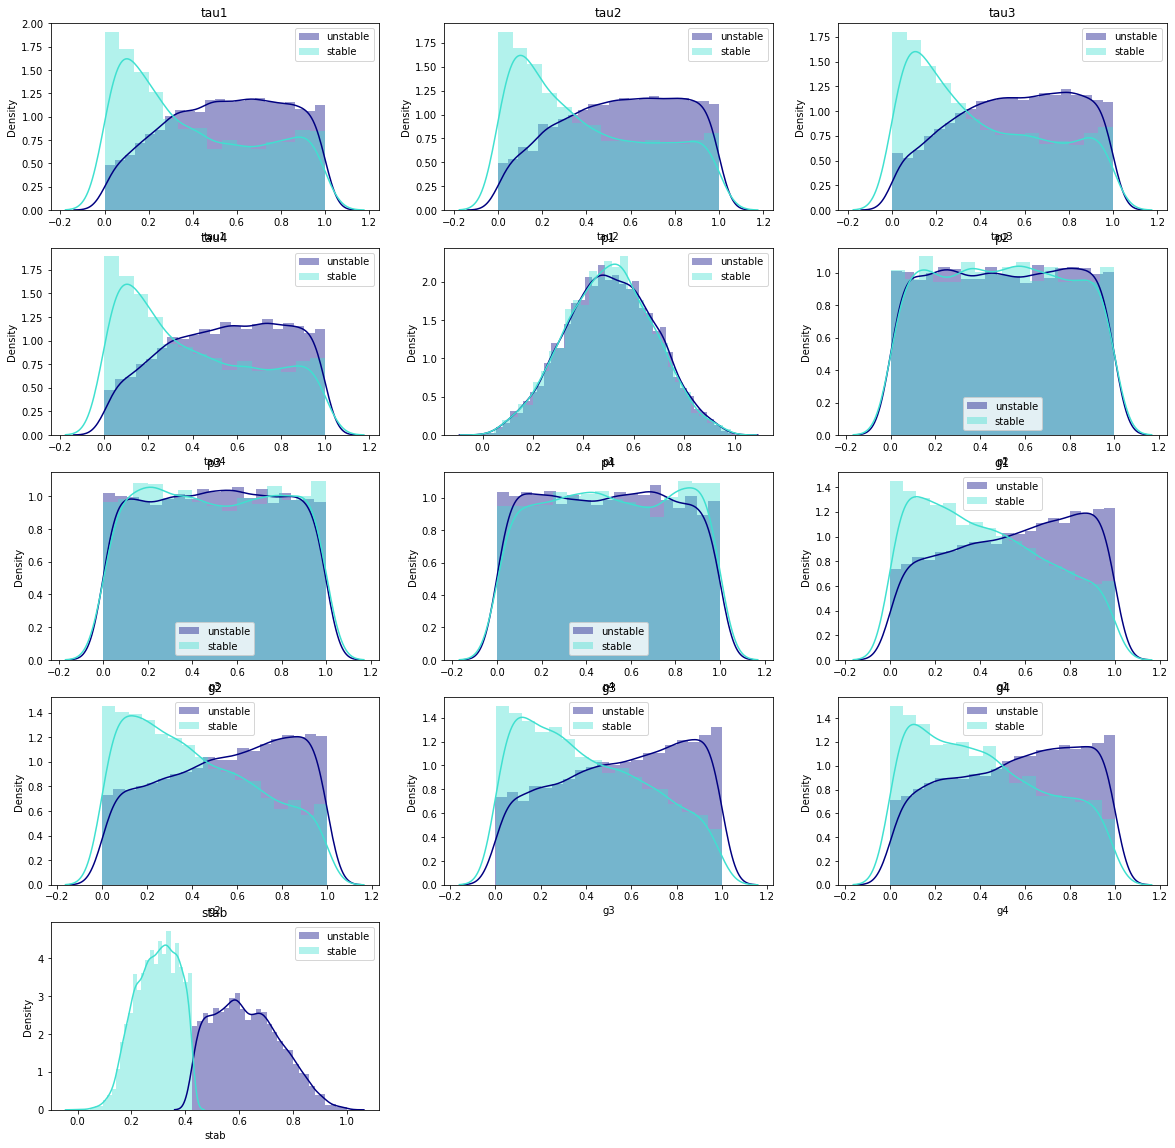

In [149]:
colors = ['navy', 'turquoise']
number_of_features = lab_dataX.shape[1]
number_of_classes = len(np.unique(lab_dataY))
target_names = ['unstable','stable']
feature_names = lab_dataX.columns
class_names = ['unstable','stable']
fig = plt.figure(figsize=(20, 20))
fig.subplots(nrows=4, ncols=3)
for feat_i in range(number_of_features): #For each feature, we have a new subplot
    ax = plt.subplot(5,3, feat_i+1)
    plt.title(feature_names[feat_i]) 
    for class_i in range(number_of_classes): #After that we draw the within-class histograms of the same feature
        sns.distplot(lab_dataX.loc[df['stabf']== class_names[class_i]][feature_names[feat_i]], color=colors[class_i], label=target_names[class_i]) # (X[y==c,i] means we get the i'th column of X where the class in the same row in y is equal to c
    plt.legend()
plt.show()

In [76]:
#sns.pairplot(new_df)

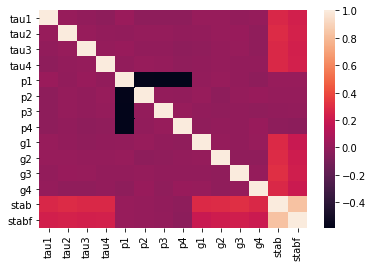

In [77]:
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix)

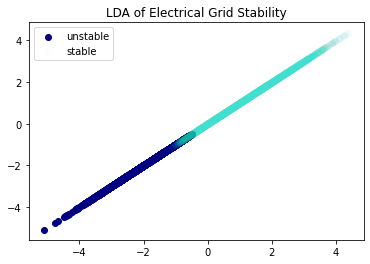

In [133]:
lda = LinearDiscriminantAnalysis(n_components=1) 
X_LDA = lda.fit(lab_dataX, lab_dataY).transform(lab_dataX) # We fit the LDA model to X,y with fit() and apply it to X immediately with transform() 
#Note that in LDA, we also give class information when fitting the model since it is a supervised method unlike PCA
plt.figure() #We can again draw the data to a 2D space
for color, i, target_name in zip(colors, [0, 1], target_names):
   if target_name=='unstable':
    plt.scatter(X_LDA[lab_dataY.to_numpy() == 0], X_LDA[lab_dataY.to_numpy()==0],color=color,label=target_name)
   else:
    plt.scatter(X_LDA[lab_dataY.to_numpy() == 1], X_LDA[lab_dataY.to_numpy()==1],alpha=0.02 ,color=color,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Electrical Grid Stability')
plt.show()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(lab_dataX, lab_dataY, test_size=0.30, random_state=42) #We split the original dataset (we use a fixed random state such as 42 so we always split the data the same way)
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(principalDf, lab_dataY, test_size=0.30, random_state=42) #We split the PCA dimensionaly reducted dataset
X_LDA_train, X_LDA_test, y_LDA_train, y_LDA_test = train_test_split(X_LDA, lab_dataY, test_size=0.30, random_state=42) #We split the LDA dimensionaly reducted dataset


In [143]:
#LDA model
lda = LinearDiscriminantAnalysis(store_covariance=True) 
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test) 
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("LDA accuracy for the original Iris dataset", accuracy) 
print("LDA precision for the original Iris dataset", precision_score(y_test,y_pred))
print("LDA recall for the original Iris dataset", recall_score(y_test,y_pred))
print("LDA f1 score for the original Iris dataset", f1_score(y_test,y_pred))

LDA accuracy for the original Iris dataset 0.966
LDA precision for the original Iris dataset 0.9962182603997839
LDA recall for the original Iris dataset 0.9510056730273336
LDA f1 score for the original Iris dataset 0.9730870712401055


In [139]:
# QDA with original dataset
qda = QuadraticDiscriminantAnalysis() 
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
print("QDA accuracy for the original dataset", np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3))
print("QDA precision for the original dataset", np.round(precision_score(y_test,y_pred),3))
print("QDA recall for the original dataset", np.round(recall_score(y_test,y_pred),3))
print("QDA f1 score for the original dataset", np.round(f1_score(y_test,y_pred),3))

QDA accuracy for the original dataset 0.965
QDA precision for the original dataset 0.97
QDA recall for the original dataset 0.975
QDA f1 score for the original dataset 0.973


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [121]:
#Naive Bayes model
gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3)
print("Naive Bayes accuracy for the original dataset", accuracy)
print("Naive Bayes precision for the original dataset", precision_score(y_test,y_pred))
print("Naive Bayes recall for the original dataset", recall_score(y_test,y_pred))
print("Naive Bayes f1 score for the original dataset", f1_score(y_test,y_pred))

Naive Bayes accuracy for the original Iris dataset 0.974
Naive Baye precision for the original Iris dataset 0.9899947340705635
Naive Baye recall for the original Iris dataset 0.9695719443011862
Naive Baye f1 score for the original Iris dataset 0.979676915059927


In [148]:
gnb = GaussianNB() 
gnb.fit(X_LDA_train, y_LDA_train)
y_pred = gnb.predict(X_LDA_test)
accuracy = np.round(np.sum(y_LDA_test == y_pred)/len(y_LDA_test),3)
print("Naive Bayes accuracy for the LDA dimensionaliy reducted dataset", accuracy)
print("Naive Bayes precision for the LDA dimensionaliy reducted dataset", precision_score(y_test,y_pred))
print("Naive Bayes recall for the LDA dimensionaliy reducted dataset", recall_score(y_test,y_pred))
print("Naive Bayes f1 score for the LDA dimensionaliy reducted dataset", f1_score(y_test,y_pred))

Naive Bayes accuracy for the LDA dimensionaliy reducted dataset 0.98
Naive Bayes precision for the LDA dimensionaliy reducted dataset 0.9870466321243523
Naive Bayes recall for the LDA dimensionaliy reducted dataset 0.9824651882413615
Naive Bayes f1 score for the LDA dimensionaliy reducted dataset 0.984750581545619


In [137]:
#QDA with PCA
qda = QuadraticDiscriminantAnalysis() 
qda.fit(X_PCA_train, y_PCA_train)
y_pred = qda.predict(X_PCA_test)
print("QDA accuracy for the PCA dimensionaly reducted", np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3))
print("QDA precision for the PCA dimensionaly reducted", np.round(precision_score(y_test,y_pred),3))
print("QDA recall for the PCA dimensionaly reducted", np.round(recall_score(y_test,y_pred),3))
print("QDA f1 score for the PCA dimensionaly reducted", np.round(f1_score(y_test,y_pred),3))

QDA accuracy for the PCA dimensionaly reducted 0.87
QDA precision for the PCA dimensionaly reducted 0.903
QDA recall for the PCA dimensionaly reducted 0.895
QDA f1 score for the PCA dimensionaly reducted 0.899


LDA accuracy for the PCA dimensionaly reducted 0.867
LDA precision for the PCA dimensionaly reducted 0.866
LDA recall for the PCA dimensionaly reducted 0.94
LDA f1 score for the PCA dimensionaly reducted 0.902


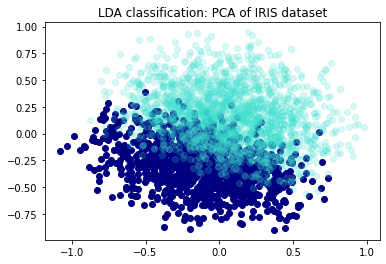

In [127]:
#With priors
lda = LinearDiscriminantAnalysis(priors = [0.25,0.75])
lda.fit(X_PCA_train, y_PCA_train)
y_pred = lda.predict(X_PCA_test)
print("LDA accuracy for the PCA dimensionaly reducted", np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3))
print("LDA precision for the PCA dimensionaly reducted", np.round(precision_score(y_test,y_pred),3))
print("LDA recall for the PCA dimensionaly reducted", np.round(recall_score(y_test,y_pred),3))
print("LDA f1 score for the PCA dimensionaly reducted", np.round(f1_score(y_test,y_pred),3))

#Visualize the test set and the errors which have occured
plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    if target_name == 'stable':
      plt.scatter(X_PCA_test.loc[y_PCA_test == 1]['principal component 1'], X_PCA_test.loc[y_PCA_test == 1]['principal component 2'],alpha=0.2, color=color,label=target_name)
    else:
      plt.scatter(X_PCA_test.loc[y_PCA_test == 0]['principal component 1'], X_PCA_test.loc[y_PCA_test == 0]['principal component 2'], color=color, label=target_name)
plt.title('LDA classification: PCA the dataset')
plt.show()

**According the accuracy, the best model for use is Naive Bayes fitted with original normalized dataset. Correlations between features are very small, since then we can assume that features will be independent, which is also assumption of Naive Bayes model. LDA is fine in this problem, but produces lower value of accuracy, maybe cause non-linearity in the dataset.**

Also we can notice the Naive Bayes model fitted with LDA dimensionaly reducted dataset produces better, but there is no sense, since LDA uses Bayes Theorem and Naive Bayes uses Bayes Theorem, therefore could lead to overfitting. (Can I prove this mathematically?)